## Cross-validation

In [57]:
# cross_val_score()
#Import libraries 

import pandas as pd
from sklearn import preprocessing

iris = pd.read_csv("iris.csv")
display(iris.head())

label_encoder = preprocessing.LabelEncoder()
iris['Name'] = label_encoder.fit_transform(iris['Name'])

display(iris.head())

iris_X = iris.iloc[:,:-1] 
iris_y = iris['Name']

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dt = DecisionTreeClassifier()
knn = DecisionTreeClassifier()

# accuracy for 
accuracy_iris_dt = cross_val_score(dt,iris_X, iris_y,cv = 10,scoring = "accuracy")
accuracy_iris_knn = cross_val_score(knn,iris_X, iris_y,cv = 10,scoring = "accuracy")

# accuracy for each fold
print("Accuracy for dt model \n ")
for i, acc in enumerate(accuracy_iris_dt):

    print("Fold {}, Accuracy: {}".format(i,acc * 100))

# mean accuracy
print("\n mean accuracy dt: {}".format(accuracy_iris_dt.mean()))
print("\n mean accuracy knn: {}".format(accuracy_iris_knn.mean()))

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Accuracy for dt model 
 
Fold 0, Accuracy: 100.0
Fold 1, Accuracy: 93.33333333333333
Fold 2, Accuracy: 100.0
Fold 3, Accuracy: 93.33333333333333
Fold 4, Accuracy: 93.33333333333333
Fold 5, Accuracy: 86.66666666666667
Fold 6, Accuracy: 93.33333333333333
Fold 7, Accuracy: 93.33333333333333
Fold 8, Accuracy: 100.0
Fold 9, Accuracy: 100.0

 mean accuracy dt: 0.9533333333333334

 mean accuracy knn: 0.96


### Stratified sampling in Cross Validation

In [28]:
#StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.model_selection import StratifiedKFold

cross_val = StratifiedKFold(n_splits = 10,shuffle = True, random_state= 42)
accuracy_iris_dt = cross_val_score(dt, iris_X,iris_y, cv = cross_val, scoring = "accuracy")

print("mean accuracy: ", round(accuracy_iris_dt.mean(),2))

mean accuracy:  0.93


### Obtaining predictions by cross-validation

In [29]:
#cross_val_predict(dt, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))

from sklearn.model_selection import cross_val_predict

cross_val = StratifiedKFold(n_splits = 10,shuffle = True, random_state= 42)
predicted = cross_val_predict(dt, iris_X,iris_y, cv = cross_val)
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Manual Cross-Validation

In [41]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Set the number of folds for cross-validation
num_folds = 5

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a KNN classifier (you can replace this with any other classifier)
classifier = KNeighborsClassifier(n_neighbors=3)

# Perform manual cross-validation
fold_accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

# Calculate and print the average accuracy
average_accuracy = sum(fold_accuracies) / num_folds
print(f'Average Accuracy: {average_accuracy:.2f}')


Name
0    50
1    50
2    50
Name: count, dtype: int64

## Pipeline

In [30]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

transform = StandardScaler()
estimator = KNeighborsClassifier(n_neighbors =4)

pipeline = Pipeline([('normalisation', transform),('classifier',estimator)])

# in cross_val step the train_dat is fitted to the KNeighbors classifier
accuracy_iris = cross_val_score(pipeline,iris_X,iris_y, cv = 10, scoring= 'accuracy')

print("mean accuracy: ", accuracy_iris.mean()*100, "%");

mean accuracy:  94.66666666666667 %


### Setting parameters inside the pipeline

In [31]:
#pipeline.set_params()

pipeline = pipeline.set_params(classifier__n_neighbors=1)

# in cross_val step the train_dat is fitted to the KNeighbors classifier
accuracy_iris = cross_val_score(pipeline,iris_X,iris_y, cv = 10, scoring= 'accuracy')

print("mean accuracy: ", accuracy_iris.mean()*100, "%");


mean accuracy:  95.33333333333334 %


### Mixed feature transformation inside the pipeline (Numerical and categorical transformations)

In [32]:
# ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# load a dataset
golf = pd.read_csv('golf.csv')
golf_target = golf['Play']
golf = golf.drop(columns='Play')
display(golf.head())

preporcessor =  ColumnTransformer(transformers=[('scaler',StandardScaler(),['Temperature','Humidity']),
                    ('encoder',OneHotEncoder(),['Outlook','Wind'])])

# preprocessed = pd.DataFrame(preporcessor.fit_transform(golf))
# display(preprocessed.head())

#pipeline
pipeline = Pipeline([('preprocessing', preporcessor),('classifier',estimator)])

#cross val
accuracy = cross_val_score(pipeline, golf, golf_target, cv=2, 
scoring='accuracy')
print("mean accuracy golf: ", accuracy.mean()*100, "%");

,Outlook,Temperature,Humidity,Wind
0,sunny,85.0,85.0,False
1,sunny,80.0,90.0,True
2,overcast,83.0,78.0,False
3,rain,70.0,96.0,False
4,rain,68.0,80.0,False


mean accuracy golf:  50.0 %


### Inspect intermediate results in Pipelines

In [56]:
# transformed_data = pipeline.named_steps['pca'].transform(X_train)
# display(transformed_data)

"""
To inspect intermediate results in scikit-learn pipelines, you can use the named_steps attribute of the pipeline 
to access each step by its name. This allows you to access intermediate results, such as transformed data or 
fitted models, for analysis or debugging.

Here's an example of how you can inspect intermediate results in a pipeline: 
"""
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and a classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Access intermediate results
transformed_data = pipeline.named_steps['pca'].transform(X_train)
display(transformed_data)
fitted_classifier = pipeline.named_steps['classifier']

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


array([[ 3.05649567, -0.95401922, -0.82383948, ...,  0.03381184,
        -1.24518604, -1.56672477],
       [-0.50653924,  1.04606525,  0.34440833, ..., -1.23116578,
         1.29639753,  0.30839196],
       [ 3.51747205,  2.1146617 ,  1.12390647, ..., -0.80833076,
        -0.05576302,  0.5962568 ],
       ...,
       [ 2.98128687,  2.07167946, -0.4828292 , ..., -0.49837884,
        -2.15610128, -0.76255609],
       [ 3.48515891,  0.26686802, -0.36159091, ..., -0.21583882,
         0.46227323,  0.63615313],
       [-1.7483395 , -0.98665154,  0.70202289, ..., -1.2724968 ,
         0.27230395,  0.19444399]])

Accuracy: 0.76


## Balancing

### Undersampling and Oversampling

In [33]:
# %pip install -q -U imbalanced-learn

#RandomUnderSampler(sampling_strategy='auto', random_state=42)
#RandomOverSampler(sampling_strategy='auto', random_state=42)

iris_imbalanced = pd.read_csv('iris_imbalanced.csv')
iris_ib_X = iris_imbalanced.iloc[:,:4]
iris_ib_y = iris_imbalanced['Name']

print("Original imbalanced dataset \n", iris_imbalanced['Name'].value_counts())

#RandomUnderSampler()
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler()
iris_balanced_X,iris_balanced_y = sampler.fit_resample(iris_ib_X,iris_ib_y)

print("\nIris balanced dataset after undersampling: \n" ,iris_balanced_y.value_counts())

#RandomOverSampler()
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
iris_balanced_X,iris_balanced_y = sampler.fit_resample(iris_ib_X,iris_ib_y)

print("\nIris balanced dataset after oversampling: \n" ,iris_balanced_y.value_counts())



Original imbalanced dataset 
 Name
Iris-virginica     250
Iris-setosa         50
Iris-versicolor     50
Name: count, dtype: int64

Iris balanced dataset after undersampling: 
 Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Iris balanced dataset after oversampling: 
 Name
Iris-setosa        250
Iris-versicolor    250
Iris-virginica     250
Name: count, dtype: int64


## Evaluation metrices 

### Classification report - Precision / Recall / f1

In [45]:
# classification_report(y_test,y_pred)
# confusion_matrix(y_test, y_pred)

predicted = cross_val_predict(dt, iris_X,iris_y, cv = 10)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(predicted, iris_y)
display(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(iris_y,predicted, target_names = label_encoder.classes_))



array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



### ROC and AUC

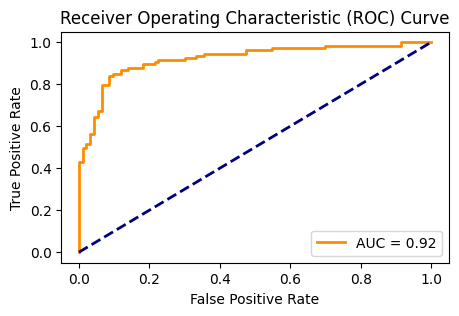

In [51]:
#  Receiver Operating Characteristic (ROC) curve for a binary classification model.

# fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
# roc_auc = auc(fpr, tpr)


from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



### ROC Curves with Validation

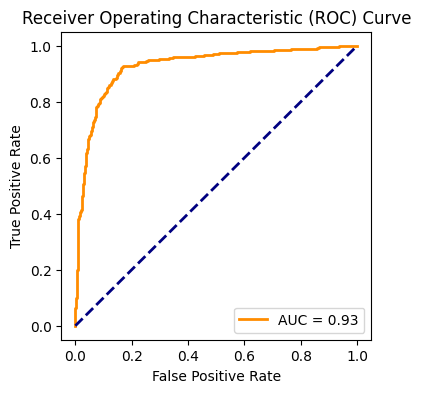

In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validated predictions
y_probabilities = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

# Compute ROC curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
